In [1]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [3]:
dataset = loadtxt('diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [4]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 0s 494us/step - loss: 34.1683 - accuracy: 0.6510
Epoch 2/150
77/77 [==============================] - 0s 468us/step - loss: 3.8220 - accuracy: 0.5143
Epoch 3/150
77/77 [==============================] - 0s 468us/step - loss: 2.3210 - accuracy: 0.5182
Epoch 4/150
77/77 [==============================] - 0s 481us/step - loss: 1.7727 - accuracy: 0.5247
Epoch 5/150
77/77 [==============================] - 0s 481us/step - loss: 1.4557 - accuracy: 0.5521
Epoch 6/150
77/77 [==============================] - 0s 468us/step - loss: 1.1433 - accuracy: 0.5768
Epoch 7/150
77/77 [==============================] - 0s 481us/step - loss: 1.0108 - accuracy: 0.6042
Epoch 8/150
77/77 [==============================] - 0s 468us/step - loss: 0.9521 - accuracy: 0.6159
Epoch 9/150
77/77 [==============================] - 0s 494us/step - loss: 0.9063 - accuracy: 0.6263
Epoch 10/150
77/77 [==============================] - 0s 481us/step - loss: 0.7892 - accur

In [7]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 375us/step - loss: 0.4598 - accuracy: 0.7786
Accuracy: 77.86


In [8]:
predictions = model.predict(X)
rounded = [round(x[0]) for x in predictions]

In [10]:
predictions = model.predict_classes(X)
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [13]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 77.86%


In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [19]:
from sklearn.model_selection import train_test_split
X = dataset[:,0:8]
y = dataset[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(514, 8) (254, 8) (514,) (254,)


In [31]:
fitted = model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
52/52 [==============================] - 0s 500us/step - loss: 0.4863 - accuracy: 0.7646
Epoch 2/150
52/52 [==============================] - 0s 520us/step - loss: 0.5435 - accuracy: 0.7412
Epoch 3/150
52/52 [==============================] - 0s 500us/step - loss: 0.5387 - accuracy: 0.7315
Epoch 4/150
52/52 [==============================] - 0s 500us/step - loss: 0.5963 - accuracy: 0.7257
Epoch 5/150
52/52 [==============================] - 0s 481us/step - loss: 0.5399 - accuracy: 0.7471
Epoch 6/150
52/52 [==============================] - 0s 500us/step - loss: 0.4794 - accuracy: 0.7704
Epoch 7/150
52/52 [==============================] - 0s 500us/step - loss: 0.4952 - accuracy: 0.7607
Epoch 8/150
52/52 [==============================] - 0s 520us/step - loss: 0.4652 - accuracy: 0.7763
Epoch 9/150
52/52 [==============================] - 0s 500us/step - loss: 0.4682 - accuracy: 0.7763
Epoch 10/150
52/52 [==============================] - 0s 558us/step - loss: 0.4869 - accura

In [32]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

8/8 [==============================] - 0s 751us/step - loss: 0.5878 - accuracy: 0.7480
Accuracy: 74.80


In [33]:
predictions = model.predict_classes(X_test)
for i in range(40):
	print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y_test[i]))

[7.0, 136.0, 74.0, 26.0, 135.0, 26.0, 0.647, 51.0] => 1 (expected 0)
[1.0, 151.0, 60.0, 0.0, 0.0, 26.1, 0.179, 22.0] => 1 (expected 0)
[6.0, 109.0, 60.0, 27.0, 0.0, 25.0, 0.206, 27.0] => 0 (expected 0)
[3.0, 61.0, 82.0, 28.0, 0.0, 34.4, 0.243, 46.0] => 0 (expected 0)
[1.0, 116.0, 78.0, 29.0, 180.0, 36.1, 0.496, 25.0] => 0 (expected 0)
[0.0, 119.0, 66.0, 27.0, 0.0, 38.8, 0.259, 22.0] => 0 (expected 0)
[4.0, 122.0, 68.0, 0.0, 0.0, 35.0, 0.394, 29.0] => 0 (expected 0)
[1.0, 119.0, 54.0, 13.0, 50.0, 22.3, 0.205, 24.0] => 0 (expected 0)
[1.0, 97.0, 70.0, 40.0, 0.0, 38.1, 0.218, 30.0] => 0 (expected 0)
[0.0, 105.0, 64.0, 41.0, 142.0, 41.5, 0.173, 22.0] => 0 (expected 0)
[7.0, 137.0, 90.0, 41.0, 0.0, 32.0, 0.391, 39.0] => 0 (expected 0)
[1.0, 95.0, 74.0, 21.0, 73.0, 25.9, 0.673, 36.0] => 0 (expected 0)
[0.0, 180.0, 78.0, 63.0, 14.0, 59.4, 2.42, 25.0] => 1 (expected 1)
[11.0, 138.0, 74.0, 26.0, 144.0, 36.1, 0.557, 50.0] => 1 (expected 1)
[0.0, 118.0, 64.0, 23.0, 89.0, 0.0, 1.731, 21.0] => 0 (e

In [35]:
print(fitted.history.keys())

dict_keys(['loss', 'accuracy'])


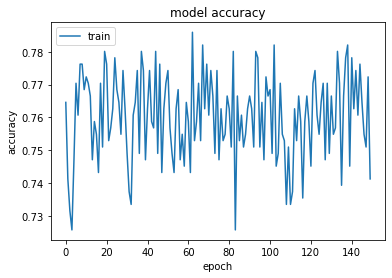

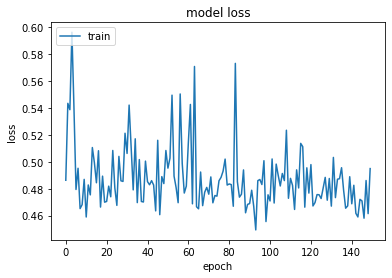

In [36]:
import matplotlib.pyplot as plt
plt.plot(fitted.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fitted.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()